## Heart Disease Classification: Predicting Cardiovascular Risk Using Patient Data

# Introduction

Cardiovascular diseases remain the leading cause of death globally, accounting for approximately 17.9 million deaths annually according to the World Health Organization. Early detection and risk assessment are crucial for preventive care and timely intervention. This project aims to develop a machine learning classification model that can predict the presence and severity of heart disease based on patient clinical attributes.

Can we accurately classify patients based on their heart disease status using clinical and demographic features? What factors are most predictive of cardiovascular risk?



Key Questions:

Which machine learning algorithms perform best for heart disease classification?

What clinical features are most important in predicting heart disease?

How can we interpret the model to provide actionable insights for healthcare providers?

## Introducing The Data

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

This dataset combines four databases from different institutions: Cleveland, Hungary, Switzerland, and VA Long Beach. It contains 920 patient records with 14 clinical attributes.

Features

age: Patient's age in years

sex: Biological sex (Male/Female)

cp: Chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)

trestbps: Resting blood pressure (mm Hg)

chol: Serum cholesterol (mg/dl)

fbs: Fasting blood sugar > 120 mg/dl (True/False)

restecg: Resting electrocardiographic results

thalch: Maximum heart rate achieved

exang: Exercise induced angina (True/False)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment

ca: Number of major vessels colored by fluoroscopy

thal: Thallium stress test result

num: Target variable (0 = no disease, 1-4 = presence and severity of disease)

## Preprocessing

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv("/Users/htallapr/Downloads/heart_disease_uci.csv")

# Preprocessing steps
def preprocess_heart_data(df):
    # Create a copy
    data = df.copy()
    
    # Convert target to binary classification (0: no disease, 1: disease)
    data['heart_disease'] = (data['num'] > 0).astype(int)
    
    # Handle missing values
    numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
    
    # Impute numeric columns with median
    num_imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
    
    # Impute categorical columns with mode
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
    
    # Encode categorical variables
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    
    # Feature selection (excluding id and original target)
    features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalch', 'exang', 'oldpeak', 'slope', 'thal']
    
    X = data[features]
    y = data['heart_disease']
    
    return X, y, label_encoders

X, y, encoders = preprocess_heart_data(df)

For this project, the multi-class target variable was transformed into a binary classification task to allow for clearer interpretation. Missing values were handled by imputing the median for numeric features, which is robust to outliers, and the mode for categorical features, which helps preserve the original distribution. Categorical variables were encoded using label encoding, which is particularly effective for tree-based models that can interpret ordinal relationships. Finally, identifier columns were removed, and only clinically relevant features were retained to ensure the model focused on meaningful predictors.

## Data Understanding and Visualization

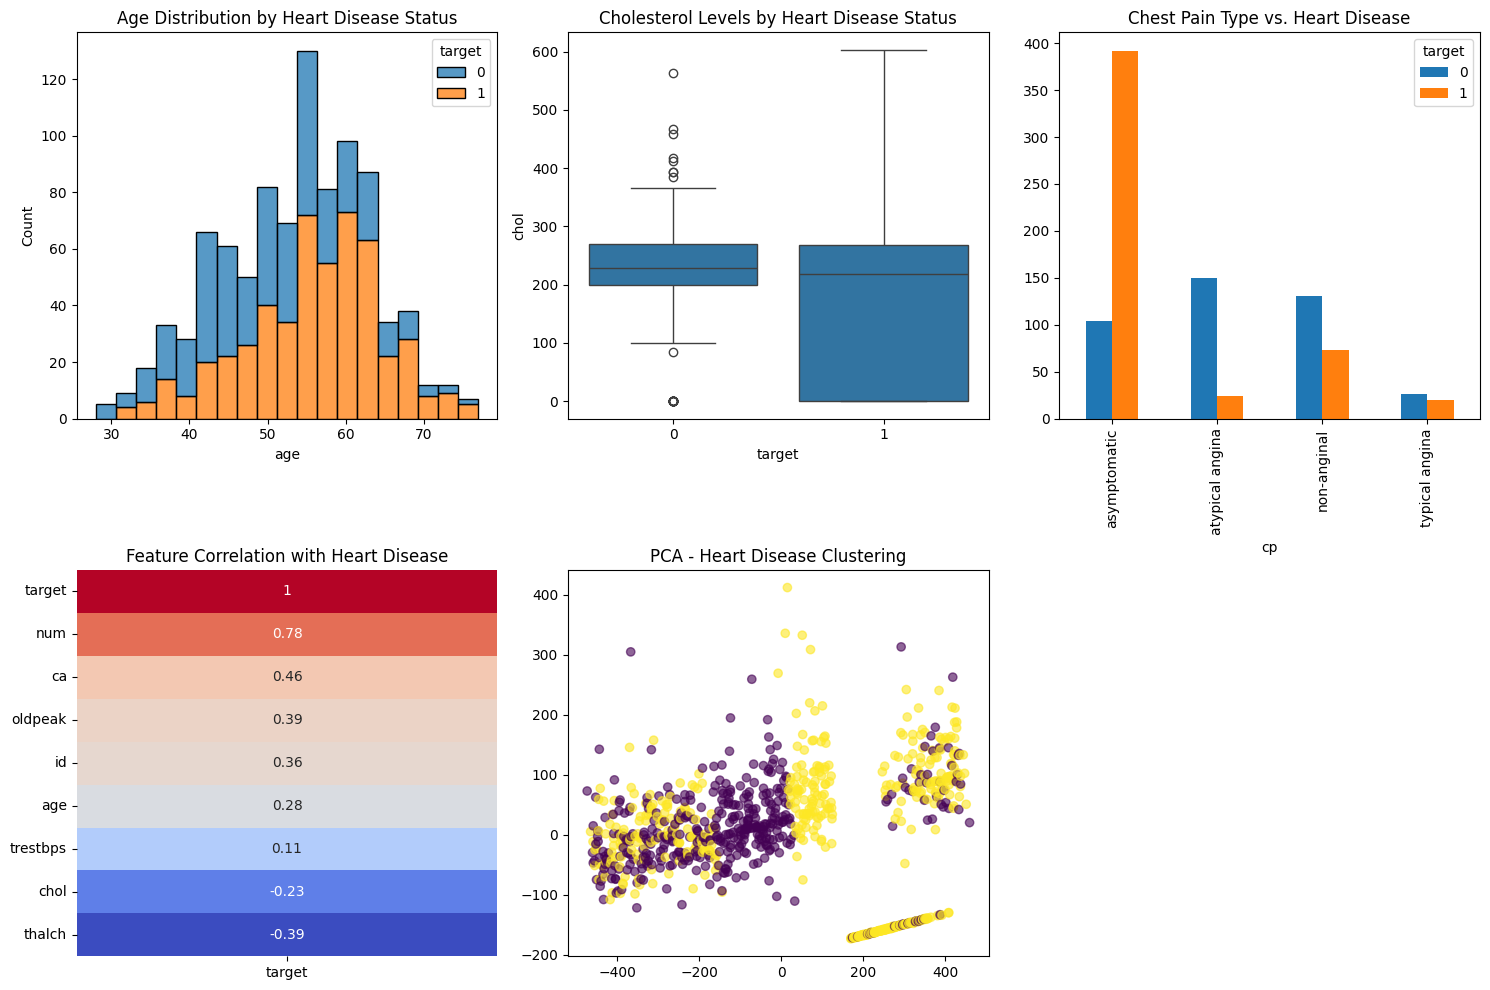

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Make binary target: 0 = no disease, 1 = disease (1-4)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Define features and labels
X = df.drop(columns=['num', 'target'])
y = df['target']

# Data distribution analysis
plt.figure(figsize=(15, 10))

# Age distribution by heart disease status
plt.subplot(2, 3, 1)
sns.histplot(data=df, x='age', hue='target', multiple="stack")
plt.title('Age Distribution by Heart Disease Status')

# Cholesterol vs. Heart Disease
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Status')

# Chest Pain Type Distribution
plt.subplot(2, 3, 3)
pd.crosstab(df['cp'], df['target']).plot(kind='bar', ax=plt.gca())
plt.title('Chest Pain Type vs. Heart Disease')

# Correlation Heatmap (numeric only)
plt.subplot(2, 3, 4)
correlation_matrix = df.corr(numeric_only=True)['target'].sort_values(ascending=False)
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Feature Correlation with Heart Disease')

# PCA Visualization (numeric only + imputed)
plt.subplot(2, 3, 5)
X_numeric = X.select_dtypes(include=['number']).fillna(X.median(numeric_only=True))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('PCA - Heart Disease Clustering')

plt.tight_layout()
plt.show()


## Modeling

SVM finds the best dividing line between patients with and without heart disease by transforming the features into higher dimensions where they're easier to separate. It's great because it handles complex patterns well and doesn't overfit easily. The downside is it needs all the features to be on the same scale first, and it's kind of a black box - hard to explain why it makes certain predictions.

Random Forest builds lots of decision trees that each look at different parts of the data, then combines their votes. It's really good for medical data because it works with different types of measurements without needing scaling, shows which features matter most (like which symptoms are most important), and is more accurate than single trees. Plus, doctors can actually understand why it makes certain predictions, which is important for medical use

## Storytelling 

## Impact

## References

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

UCI Machine Learning Repository - Heart Disease Datase: https://archive.ics.uci.edu/dataset/45/heart+disease

World Health Organization. (2021). Cardiovascular diseases fact sheet.

Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research.

Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System.